# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Huffaz Muhammad Abdurrofi Baith
- **Email:** huffazbaith@gmail.com
- **ID Dicoding:** Huffaz Muhammad Abdurrofi Baith

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Bagaimana pola penyewaan sepeda berubah di setiap musim? Apakah ada perbedaan signifikan antara musim semi, panas, gugur, dan musim dingin?
- Pertanyaan 2: Bagaimana cuaca mempengaruhi jumlah penyewaan sepeda?
- Pertanyaan 3: Apa pola penyewaan sepeda harian dan bagaimana distribusi penyewaan pada jam-jam tertentu dalam sehari?

Dataset ini merupakan kumpulan data yang berkaitan dengan proses penyewaan sepeda yang sangat terkait dengan lingkungan dan pengaturan musiman. Faktor-faktor seperti kondisi cuaca, presipitasi, hari dalam seminggu, musim, jam dalam sehari, dll. dapat memengaruhi perilaku penyewaan. Data inti dalam dataset ini terkait dengan catatan sejarah dua tahun yang sesuai dengan tahun 2011 dan 2012 dari sistem Capital Bikeshare di Washington D.C., Amerika Serikat, yang tersedia secara publik di http://capitalbikeshare.com/system-data. Data ini dibuat dalam interval dua jam dan harian, kemudian diekstraksi dan ditambahkan informasi cuaca dan musiman yang sesuai. Informasi cuaca diambil dari http://www.freemeteo.com.

#### Karakteristik Dataset
Kedua dataset hour.csv dan day.csv memiliki atribut-atribut berikut, kecuali hr yang tidak tersedia dalam day.csv:
- instant: indeks catatan
- dteday: tanggal
- season: musim (1: musim semi, 2: musim panas, 3: musim gugur, 4: musim dingin)
- yr: tahun (0: 2011, 1: 2012)
- mnth: bulan (1 hingga 12)
- hr: jam (0 hingga 23) [tidak ada dalam day.csv]
- holiday: menunjukkan apakah hari tersebut merupakan hari libur atau tidak (diambil dari http://dchr.dc.gov/page/holiday-schedule)
- weekday: hari dalam seminggu
- workingday: 1 jika hari itu bukan akhir pekan atau hari libur, sebaliknya 0
- weathersit:
        1: Cerah, Sedikit awan, Sebagian berawan, Sebagian berawan
        2: Kabut + Berawan, Kabut + Awan pecah, Kabut + Sedikit awan, Kabut
        3: Salju ringan, Hujan ringan + Petir + Awan bertebaran, Hujan ringan + Awan bertebaran
        4: Hujan lebat + Pecahan Es + Petir + Kabut, Salju + Kabut
- temp: Suhu terstandar dalam Celsius. Nilainya dibagi oleh 41 (maksimum)
- atemp: Suhu terasa terstandar dalam Celsius. Nilainya dibagi oleh 50 (maksimum)
- hum: Kelembaban terstandar. Nilainya dibagi oleh 100 (maksimum)
- windspeed: Kecepatan angin terstandar. Nilainya dibagi oleh 67 (maksimum)
- casual: jumlah pengguna sewa kasual
- registered: jumlah pengguna terdaftar
- cnt: jumlah total sepeda yang disewa, termasuk pengguna kasual dan terdaftar

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Data Wrangling

### Data Gathering

In [2]:
df_day = pd.read_csv("Bike-sharing-dataset/day.csv")
df_day

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [3]:
df_hour = pd.read_csv("Bike-sharing-dataset/hour.csv")
df_hour

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


### Data Assessing

#### Cek informasi dan tipe data

In [4]:
# data harian
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
# data per jam
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


#### Cek missing value

In [6]:
# data harian
df_day.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
# data per jam
df_hour.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#### Cek data duplikat

In [8]:
# data harian
print("Jumlah duplikasi: ", df_day.duplicated().sum())

Jumlah duplikasi:  0


In [9]:
# data per jam
print("Jumlah duplikasi: ", df_hour.duplicated().sum())

Jumlah duplikasi:  0


#### Cek Statistik

In [10]:
# data harian
df_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [11]:
# data per jam
df_hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Tidak terdapat missing value dan data duplikat pada kedua dataset. Selain itu, dataset juga menunjukkan tidak terdapat keanehan dalam ringkasan parameter statistiknya. 

### Cleaning Data

1. Menghapus kolom yang tidak digunakan untuk menjawab pertanyaan bisnis yang diajukan. Pada proses ini kolom yang dihapus adalah kolom informasi instant, temp, atemp, hum, dan windspeed.

In [12]:
kolom_yang_tidak_digunakan = ['instant','temp', 'atemp','hum','windspeed']
df_day = df_day.drop(columns=kolom_yang_tidak_digunakan)
df_hour = df_hour.drop(columns=kolom_yang_tidak_digunakan)

In [13]:
df_hour

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,casual,registered,cnt
0,2011-01-01,1,0,1,0,0,6,0,1,3,13,16
1,2011-01-01,1,0,1,1,0,6,0,1,8,32,40
2,2011-01-01,1,0,1,2,0,6,0,1,5,27,32
3,2011-01-01,1,0,1,3,0,6,0,1,3,10,13
4,2011-01-01,1,0,1,4,0,6,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
17374,2012-12-31,1,1,12,19,0,1,1,2,11,108,119
17375,2012-12-31,1,1,12,20,0,1,1,2,8,81,89
17376,2012-12-31,1,1,12,21,0,1,1,1,7,83,90
17377,2012-12-31,1,1,12,22,0,1,1,1,13,48,61


2. Mengubah beberapa data menjadi format datetime dan juga format kategorikal beserta keterangannya

In [14]:
# Mengubah tipe data ke datetime
df_day['dteday'] = pd.to_datetime(df_day.dteday)
df_hour['dteday'] = pd.to_datetime(df_hour.dteday)

# Mengubah keterangan musim
df_day['season'] = df_day['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})

df_hour['season'] = df_hour['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})

# Mengubah keterangan cuaca
df_day['weathersit'] = df_day['weathersit'].map({
    1: 'Clear/Partly Cloudy',
    2: 'Misty/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Severe Weather'
})

df_hour['weathersit'] = df_hour['weathersit'].map({
    1: 'Clear/Partly Cloudy',
    2: 'Misty/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Severe Weather'
})

# Mengubah keterangan tahun
df_day['yr'] = df_day['yr'].map({
    0: 2011,
    1: 2012,
})

df_hour['yr'] = df_hour['yr'].map({
    0: 2011,
    1: 2012,
})


In [15]:
# Mengubah tipe data ke categorical
df_day['season'] = df_day.season.astype('category')
df_day['yr'] = df_day.yr.astype('category')
df_day['mnth'] = df_day.mnth.astype('category')
df_day['holiday'] = df_day.holiday.astype('category')
df_day['weekday'] = df_day.weekday.astype('category')
df_day['workingday'] = df_day.workingday.astype('category')
df_day['weathersit'] = df_day.weathersit.astype('category')

df_hour['season'] = df_hour.season.astype('category')
df_hour['yr'] = df_hour.yr.astype('category')
df_hour['mnth'] = df_hour.mnth.astype('category')
df_hour['holiday'] = df_hour.holiday.astype('category')
df_hour['weekday'] = df_hour.weekday.astype('category')
df_hour['workingday'] = df_hour.workingday.astype('category')
df_hour['weathersit'] = df_hour.weathersit.astype('category')

In [16]:
df_day

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,casual,registered,cnt
0,2011-01-01,Spring,2011,1,0,6,0,Misty/Cloudy,331,654,985
1,2011-01-02,Spring,2011,1,0,0,0,Misty/Cloudy,131,670,801
2,2011-01-03,Spring,2011,1,0,1,1,Clear/Partly Cloudy,120,1229,1349
3,2011-01-04,Spring,2011,1,0,2,1,Clear/Partly Cloudy,108,1454,1562
4,2011-01-05,Spring,2011,1,0,3,1,Clear/Partly Cloudy,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...
726,2012-12-27,Spring,2012,12,0,4,1,Misty/Cloudy,247,1867,2114
727,2012-12-28,Spring,2012,12,0,5,1,Misty/Cloudy,644,2451,3095
728,2012-12-29,Spring,2012,12,0,6,0,Misty/Cloudy,159,1182,1341
729,2012-12-30,Spring,2012,12,0,0,0,Clear/Partly Cloudy,364,1432,1796


In [17]:
df_hour

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,casual,registered,cnt
0,2011-01-01,Spring,2011,1,0,0,6,0,Clear/Partly Cloudy,3,13,16
1,2011-01-01,Spring,2011,1,1,0,6,0,Clear/Partly Cloudy,8,32,40
2,2011-01-01,Spring,2011,1,2,0,6,0,Clear/Partly Cloudy,5,27,32
3,2011-01-01,Spring,2011,1,3,0,6,0,Clear/Partly Cloudy,3,10,13
4,2011-01-01,Spring,2011,1,4,0,6,0,Clear/Partly Cloudy,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
17374,2012-12-31,Spring,2012,12,19,0,1,1,Misty/Cloudy,11,108,119
17375,2012-12-31,Spring,2012,12,20,0,1,1,Misty/Cloudy,8,81,89
17376,2012-12-31,Spring,2012,12,21,0,1,1,Clear/Partly Cloudy,7,83,90
17377,2012-12-31,Spring,2012,12,22,0,1,1,Clear/Partly Cloudy,13,48,61


## Exploratory Data Analysis

### Eksplorasi Data Day

1. Melihat Tren Penyewa Sepeda Berdasarkan Bulan

In [18]:
df_day.groupby(by='mnth').agg({
    'cnt': ['max', 'min', 'mean', 'sum']
})
     

cnt                           
       max   min         mean     sum
mnth                                 
1     4521   431  2176.338710  134933
2     5062  1005  2655.298246  151352
3     8362   605  3692.258065  228920
4     7460   795  4484.900000  269094
5     8294  2633  5349.774194  331686
6     8120  3767  5772.366667  346342
7     8173  3285  5563.677419  344948
8     7865  1115  5664.419355  351194
9     8714  1842  5766.516667  345991
10    8156    22  5199.225806  322352
11    6852  1495  4247.183333  254831
12    6606   441  3403.806452  211036

Berdasarkan hasil diatas, dapat disimpulkan bahwa pada pertengahan tahun yaitu bulan Juni-September jumlah penyewa sepeda dibandingkan dengan pada awal tahun dan akhir tahun.

2. Meninjau hubungan antara musim dengan penyewa sepeda

In [19]:
df_day.groupby(by='season').agg({
    'cnt': ['max', 'min', 'mean', 'sum']
})
     

cnt                            
         max   min         mean      sum
season                                  
Fall    8714  1115  5644.303191  1061129
Spring  7836   431  2604.132597   471348
Summer  8362   795  4992.331522   918589
Winter  8555    22  4728.162921   841613

Dapat dilihat jika secara jumlah total dan rata-rata, penyewa sepeda terbanyak ada pada Musim Gugur, sedangkan penyewa sepeda paling sedikit ada pada Musim Semi.

3. Meninjau hubungan antara cuaca harian dengan penyewa sepeda

In [20]:
df_day.groupby(by='weathersit').agg({
    'cnt': ['max', 'min', 'mean', 'sum']
})
     

cnt                           
                      max  min         mean      sum
weathersit                                          
Clear/Partly Cloudy  8714  431  4876.786177  2257952
Light Snow/Rain      4639   22  1803.285714    37869
Misty/Cloudy         8362  605  4035.862348   996858

Dapat dilihat jika secara jumlah total dan rata-rata, penyewa sepeda terbanyak ada pada cuaca cerah/sedikit berawan, sedangkan penyewa sepeda paling sedikit ada pada saat cuaca sedikit bersalju/hujan.

4. Meninjau pola tren jumlah penyewa sepeda berdasarkan holiday

In [21]:
df_day.groupby(by='holiday').agg({
    'cnt': ['max', 'min', 'mean', 'sum']
})
     

cnt                            
          max   min         mean      sum
holiday                                  
0        8714    22  4527.104225  3214244
1        7403  1000  3735.000000    78435

Dapat dilihat jika secara jumlah total dan rata-rata, penyewa sepeda lebih banyak pada saat non-holiday dibandingkan saat holiday.

5. Meninjau pola tren jumlah penyewa sepeda berdasarkan workingday

In [22]:
df_day.groupby(by='workingday').agg({
    'cnt': ['max', 'min', 'mean', 'sum']
})
     

cnt                           
             max  min         mean      sum
workingday                                 
0           8714  605  4330.168831  1000269
1           8362   22  4584.820000  2292410

Dapat dilihat jika secara jumlah total dan rata-rata, penyewa sepeda lebih banyak pada saat workingday dibandingkan saat non-working day.

6. Meninjau pola tren jumlah penyewa sepeda berdasarkan hari

In [23]:
df_day.groupby(by='weekday').agg({
    'cnt': ['max', 'min', 'mean', 'sum']
})

cnt                           
          max   min         mean     sum
weekday                                 
0        8227   605  4228.828571  444027
1        7525    22  4338.123810  455503
2        7767   683  4510.663462  469109
3        8173   441  4548.538462  473048
4        7804   431  4667.259615  485395
5        8362  1167  4690.288462  487790
6        8714   627  4550.542857  477807

Dapat dilihat jika secara jumlah total dan rata-rata, tidak ada perbedaan signifikan pada masing-masing hari.

### Eksplorasi Data Hour

1. Meninjau pola tren cuaca per jam dengan jumlah penyewa sepeda

In [24]:
df_hour.groupby(by='weathersit').agg({
    'cnt': ['max', 'min', 'mean', 'sum']
})
     

cnt                         
                     max min        mean      sum
weathersit                                       
Clear/Partly Cloudy  977   1  204.869272  2338173
Light Snow/Rain      891   1  111.579281   158331
Misty/Cloudy         957   1  175.165493   795952
Severe Weather       164  23   74.333333      223

Dapat dilihat jika secara jumlah total dan rata-rata, penyewa sepeda terbanyak ada pada cuaca cerah/sedikit berawan, sedangkan penyewa sepeda paling sedikit ada pada saat cuaca buruk. Data ini berbeda dengan data cuaca harian dimana data cuaca harian menunjukan penyewa sepeda paling sedikit pada hujan. Pada data harian, tidak terdapat cuaca buruk.

2. Meninjau pola tren waktu jam dengan jumlah penyewa sepeda

In [25]:
df_hour.groupby(by='hr').agg({
    'cnt': ['max', 'min', 'mean', 'sum']
})
     

cnt                        
    max min        mean     sum
hr                             
0   283   2   53.898072   39130
1   168   1   33.375691   24164
2   132   1   22.869930   16352
3    79   1   11.727403    8174
4    28   1    6.352941    4428
5    66   1   19.889819   14261
6   213   1   76.044138   55132
7   596   1  212.064649  154171
8   839   5  359.011004  261001
9   426  14  219.309491  159438
10  539   8  173.668501  126257
11  663  10  208.143054  151320
12  776   3  253.315934  184414
13  760  11  253.661180  184919
14  750  12  240.949246  175652
15  750   7  251.233196  183149
16  783  11  311.983562  227748
17  976  15  461.452055  336860
18  977  23  425.510989  309772
19  743  11  311.523352  226789
20  567  11  226.030220  164550
21  584   6  172.314560  125445
22  502   9  131.335165   95612
23  256   2   87.831044   63941

Dapat dilihat jika penyewa sepeda tidak pernah sampai terdapat 0 penyewa setiap jamnya. Jumlah penyewa terbanyak ada pada pukul 17 sampai pukul 18. Sedangkan pukul 4 pagi mempunyai penyewa sepeda paling sedikit.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pola penyewaan sepeda berubah di setiap musim? Apakah ada perbedaan signifikan antara musim semi, panas, gugur, dan musim dingin?

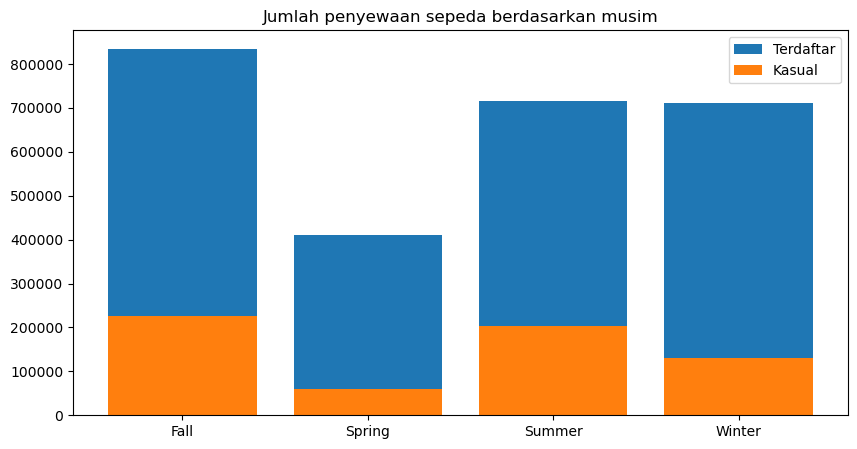

In [26]:
# Tinjauan berdasarkan penyewa terdaftar dan penyewa kasual
penyewa_musim = df_day.groupby('season')[['registered', 'casual']].sum().reset_index()

plt.figure(figsize=(10, 5))

# Membuat bar plot
plt.bar(penyewa_musim['season'],
    penyewa_musim['registered'],
    label='Terdaftar',
)

plt.bar(
    penyewa_musim['season'],
    penyewa_musim['casual'],
    label='Kasual',
)

plt.title('Jumlah penyewaan sepeda berdasarkan musim')
plt.legend()
plt.show()
     

Dari hasil analisis dengan menggunakan barplot, dapat disimpulkan bahwa musim yang paling disukai oleh pengguna sepeda (baik Casual maupun Registered) adalah musim gugur (Fall), diikuti oleh musim panas (Summer), musim dingin (Winter), dan musim semi (Spring) berada pada urutan terakhir. Hal ini juga senada dengan jumlah penyewa kasual dan penyewa terdaftar.

### Pertanyaan 2: Bagaimana cuaca mempengaruhi jumlah penyewaan sepeda?

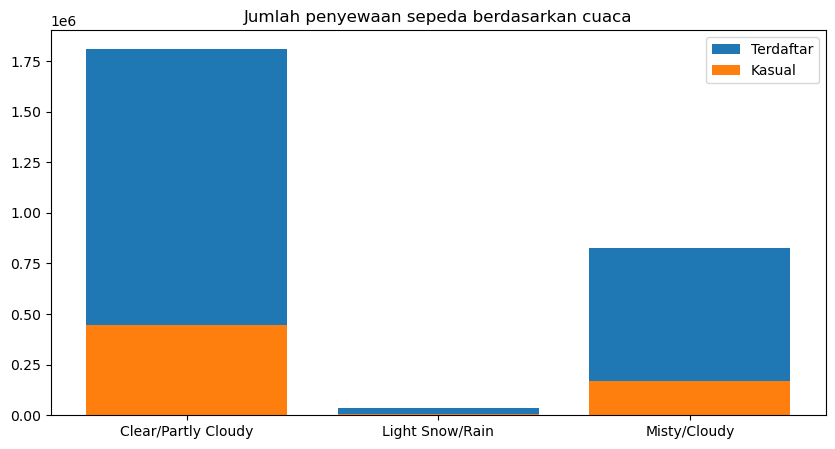

In [27]:
# Tinjauan berdasarkan penyewa terdaftar dan penyewa kasual
penyewa_cuaca_day = df_day.groupby('weathersit')[['registered', 'casual']].sum().reset_index()

plt.figure(figsize=(10, 5))

# Membuat bar plot
plt.bar(penyewa_cuaca_day['weathersit'],
    penyewa_cuaca_day['registered'],
    label='Terdaftar',
)

plt.bar(
    penyewa_cuaca_day['weathersit'],
    penyewa_cuaca_day['casual'],
    label='Kasual',
)

plt.title('Jumlah penyewaan sepeda berdasarkan cuaca')
plt.legend()
plt.show()
     

Dari hasil analisis dengan menggunakan barplot, dapat disimpulkan bahwa mpenyewa sepeda terbanyak ada pada cuaca cerah/sedikit berawan, sedangkan penyewa sepeda paling sedikit ada pada saat cuaca sedikit bersalju/hujan. Adapun secara jumlah, penyewa terdaftar lebih banyak dibanding penyewa kasual pada semua cuaca.

### Pertanyaan 3: Apa pola penyewaan sepeda harian dan bagaimana distribusi penyewaan pada jam-jam tertentu dalam sehari?

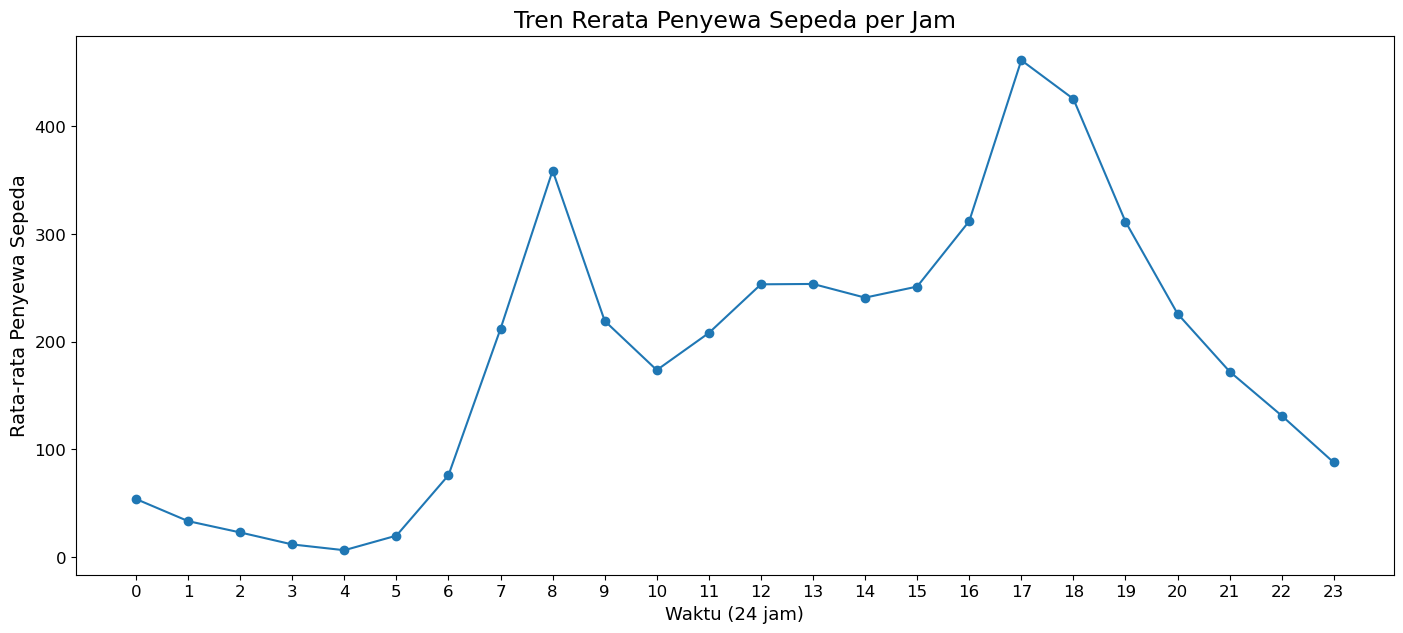

In [28]:
penyewa_hour = df_hour.groupby('hr')[["cnt"]].mean().reset_index()
plt.figure(figsize = (17,7))
plt.plot(penyewa_hour['hr'],
         penyewa_hour['cnt'],linestyle='-',marker='o')


plt.title("Tren Rerata Penyewa Sepeda per Jam",fontsize = 17)
plt.xticks(penyewa_hour['hr'])
plt.xlabel("Waktu (24 jam)",fontsize = 13)
plt.ylabel("Rata-rata Penyewa Sepeda",fontsize = 14)
plt.tick_params(axis='x', labelsize=12)  
plt.tick_params(axis='y', labelsize=12)  

Dari hasil analisis line chart, pukul 7-8 dan pukul 17-18 memiliki rerata penyewa sepeda tertinggi. Ini mungkin mencerminkan waktu-waktu puncak di mana orang lebih cenderung menyewa sepeda, seperti pagi hari untuk bepergian ke tempat kerja atau sore hari setelah jam kerja.Sedangkan pada pukul 4-5 memiliki rerata penyewa sepeda terendah. Ini bisa mencerminkan kurangnya minat atau kebutuhan untuk menyewa sepeda pada pagi hari.

## Conclusion

- Conclusion Pertanyaan 1: Dari hasil analisis dengan menggunakan barplot, dapat disimpulkan bahwa musim yang paling disukai oleh pengguna sepeda (baik Casual maupun Registered) adalah musim gugur (Fall), diikuti oleh musim panas (Summer), musim dingin (Winter), dan musim semi (Spring) berada pada urutan terakhir. Hal ini juga senada dengan jumlah penyewa kasual dan penyewa terdaftar.

- Conclusion Pertanyaan 2: Dari hasil analisis dengan menggunakan barplot, dapat disimpulkan bahwa mpenyewa sepeda terbanyak ada pada cuaca cerah/sedikit berawan, sedangkan penyewa sepeda paling sedikit ada pada saat cuaca sedikit bersalju/hujan. Adapun secara jumlah, penyewa terdaftar lebih banyak dibanding penyewa kasual pada semua cuaca.

- Conclusion Pertanyaan 3: Dari hasil analisis line chart, pukul 7-8 dan pukul 17-18 memiliki rerata penyewa sepeda tertinggi. Ini mungkin mencerminkan waktu-waktu puncak di mana orang lebih cenderung menyewa sepeda, seperti pagi hari untuk bepergian ke tempat kerja atau sore hari setelah jam kerja.Sedangkan pada pukul 4-5 memiliki rerata penyewa sepeda terendah. Ini bisa mencerminkan kurangnya minat atau kebutuhan untuk menyewa sepeda pada pagi hari.